In [2]:
import sys
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors as mcolors
import numpy as np

import json

from plot import display_training

colors = pl.colormaps['Dark2']

pl.rcParams.update({'font.size': 12})
pl.rc('axes', labelsize=14)
pl.rcParams.update({
    "text.usetex": False,
})

getting legend
displaying


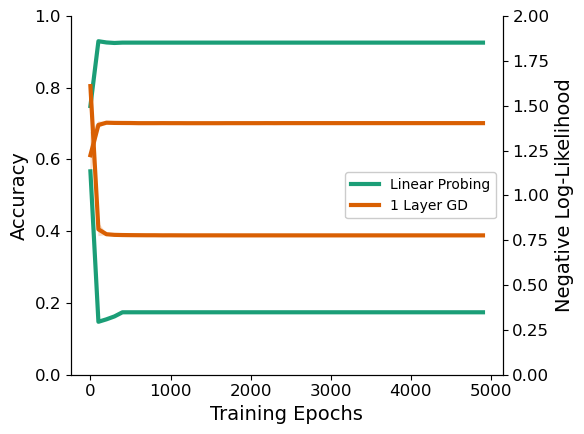

In [3]:
kernels = ['linear']
labels = ["linear"]
layers = [1]

steps = 5000 // 100

data_path_linear = "../results/imagenet_linear/layers_1/c_size_50_final/softmax"
data_path = "../results/imagenet_reg_emb_cats_5"
save_path = "../results/imagenet_reg_emb_cats_5"

es = True

color_vals = [0.05, 0.15, 0.25, 0.65, 0.45, 0.55]

lns = []

for j, model_kernel in enumerate(kernels):
    color_add = 0

    # create figure and axes
    fig, ax1 = pl.subplots()
    ax1.set_xlabel("Training Epochs")
    fig.set_size_inches(6, 4.5)

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim(0, 1)

    ax1.spines['top'].set_visible(False)

    ax2 = ax1.twinx()

    ax2.set_ylabel("Negative Log-Likelihood", color='k')
    ax2.set_ylim(0, 2)

    ax2.spines['top'].set_visible(False)

    data_f_linear = open(data_path_linear + '/results.json'.format(model_kernel))
    data_linear = json.load(data_f_linear)

    loss_trans_list = data_linear['loss_trans_list']
    # loss_trans_list = np.expand_dims(np.append(loss_trans_list, np.repeat(loss_trans_list[:][-1], 45)), axis=0)
    
    loss_trans_mean = np.mean(loss_trans_list, axis=0)
    loss_trans_mean = np.append(loss_trans_mean, np.repeat(loss_trans_mean[-1], 45))
    loss_trans_std = np.std(loss_trans_list, axis=0)
    loss_trans_std = np.append(loss_trans_std, np.repeat(loss_trans_std[-1], 45))

    acc_trans_list = data_linear['acc_trans_list']
    # acc_trans_list = np.expand_dims(np.append(acc_trans_list, np.repeat(acc_trans_list[:][-1], 45)), axis=0)
    
    acc_trans_mean = np.mean(acc_trans_list, axis=0)
    acc_trans_mean = np.append(acc_trans_mean, np.repeat(acc_trans_mean[-1], 45))
    acc_trans_std = np.std(acc_trans_list, axis=0)
    acc_trans_std = np.append(acc_trans_std, np.repeat(acc_trans_std[-1], 45))

    # Epochs
    x_range = np.arange(0, 5000, int(5000 / len(acc_trans_mean)))

    ln = ax1.plot(x_range, acc_trans_mean, color=colors(color_vals[0] + color_add), label="Linear Probing",
                 linewidth='3')
    # ax1.fill_between(x_range, acc_trans_mean - acc_trans_std, acc_trans_mean + acc_trans_std,
    #                      alpha=0.2, facecolor=colors(color_vals[0] + color_add))
        
    lns.append(ln)

    ax2.plot(x_range, loss_trans_mean, color=colors(color_vals[0] + color_add), label="Linear Probing",
                 linewidth='3')
    # ax2.fill_between(x_range, loss_trans_mean - loss_trans_std, loss_trans_mean + loss_trans_std,
    #                      alpha=0.2, facecolor=colors(color_vals[0] + color_add))

    for layer in layers:
        data_f = open(data_path + '/layers_{}/c_size_50_final/{}/results.json'.format(layer, model_kernel))
        data = json.load(data_f)

        loss_gd_list = list(filter(None, data['gd_train_loss_list']))
        acc_gd_list = list(filter(None, data['gd_train_acc_list']))

        if es:
            best_idx_gd_list = data['gd_val_best_step']
            for i, idx in enumerate(best_idx_gd_list):
                idx = idx // 100

                loss_gd_list[i][idx + 1:] = [loss_gd_list[i][idx]] * (steps - idx - 1)
                acc_gd_list[i][idx + 1:] = [acc_gd_list[i][idx]] * (steps - idx - 1)
        
        loss_gd_list = np.array(loss_gd_list)
        acc_gd_list = np.array(acc_gd_list)

        # trans_list_mean = np.mean(trans_list, axis=0)
        acc_gd_mean = np.mean(acc_gd_list, axis=0)
        loss_gd_mean = np.mean(loss_gd_list, axis=0)

        # trans_list_std = np.std(trans_list, axis=0)
        acc_gd_std = np.std(acc_gd_list, axis=0)
        loss_gd_std = np.std(loss_gd_list, axis=0)

        # Epochs
        # x_range_1 = np.arange(0, 5000, int(5000 / len(trans_list_mean)))
        x_range = np.arange(0, 5000, int(5000 / len(acc_gd_mean)))

        # ax1.plot(x_range_1, trans_list_mean, color=colors(color_vals[layer-1] + color_add),
        #          label="{} Layer".format(layer),
        #          linewidth='3')
        # ax1.fill_between(x_range_1, trans_list_mean - trans_list_std, trans_list_mean + trans_list_std,
        #                  alpha=0.2, facecolor=colors(color_vals[layer-1] + color_add))

        ln = ax1.plot(x_range, acc_gd_mean, color=colors(color_vals[layer] + color_add), label="{} Layer GD".format(layer),
                 linewidth='3')
        ax1.fill_between(x_range, acc_gd_mean - acc_gd_std, acc_gd_mean + acc_gd_std,
                         alpha=0.2, facecolor=colors(color_vals[layer] + color_add))
        
        lns.append(ln)

        ax2.plot(x_range, loss_gd_mean, color=colors(color_vals[layer] + color_add), label="{} Layer GD".format(layer),
                 linewidth='3')
        ax2.fill_between(x_range, loss_gd_mean - loss_gd_std, loss_gd_mean + loss_gd_std,
                         alpha=0.2, facecolor=colors(color_vals[layer] + color_add))


    print("getting legend")

    # lns = [ln1, ln2, ln3, ln4]
    # labels = [l.get_label() for l in lns]
    legend1 = ax1.legend(loc='center right', framealpha=1, facecolor='white', fontsize=10)
    legend1.set_zorder(100)
    print("displaying")

    plt.tight_layout()

    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    
    if es:
        plt.savefig(save_path + "/{}_gd_training_layers_es.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)
    else:
        plt.savefig(save_path + "/{}_gd_training_layers.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)


In [4]:
kernels = ['linear']
labels = ["linear"]
layers = [1]

steps = 5000 // 100

data_path_linear = "../results/imagenet_linear/layers_1/c_size_50_final/softmax"
data_path = "../results/imagenet_reg_emb_cats_5"
save_path = "../results/imagenet_reg_emb_cats_5"

es = True

color_vals = [0.05, 0.15, 0.25, 0.65, 0.45, 0.55]

lns = []

for j, model_kernel in enumerate(kernels):
    data_f_linear = open(data_path_linear + '/results.json'.format(model_kernel))
    data_linear = json.load(data_f_linear)

    loss_trans_list = data_linear['loss_trans_list']
    # loss_trans_list = np.expand_dims(np.append(loss_trans_list, np.repeat(loss_trans_list[:][-1], 45)), axis=0)
    
    loss_trans_mean = np.mean(loss_trans_list, axis=0)
    loss_trans_mean = np.append(loss_trans_mean, np.repeat(loss_trans_mean[-1], 45))
    loss_trans_std = np.std(loss_trans_list, axis=0)
    loss_trans_std = np.append(loss_trans_std, np.repeat(loss_trans_std[-1], 45))

    acc_trans_list = data_linear['acc_trans_list']
    # acc_trans_list = np.expand_dims(np.append(acc_trans_list, np.repeat(acc_trans_list[:][-1], 45)), axis=0)
    
    acc_trans_mean = np.mean(acc_trans_list, axis=0)
    acc_trans_mean = np.append(acc_trans_mean, np.repeat(acc_trans_mean[-1], 45))
    acc_trans_std = np.std(acc_trans_list, axis=0)
    acc_trans_std = np.append(acc_trans_std, np.repeat(acc_trans_std[-1], 45))

    loss_trans_list = np.expand_dims(np.array(data_linear['loss_trans_list']).mean(axis=0), axis=0)
    loss_trans_list = np.expand_dims(np.append(loss_trans_list[0], np.repeat(loss_trans_list[0][4], 45)), axis=0)

    acc_trans_list = np.expand_dims(np.array(data_linear['acc_trans_list']).mean(axis=0), axis=0)
    acc_trans_list = np.expand_dims(np.append(acc_trans_list[0], np.repeat(acc_trans_list[0][4], 45)), axis=0)


    # Epochs
    x_range = np.arange(0, 5000, int(5000 / len(acc_trans_mean)))

    for layer in layers:
        data_f = open(data_path + '/layers_{}/c_size_50_final/{}/results.json'.format(layer, model_kernel))
        data = json.load(data_f)

        gd_train_loss_list = list(filter(None, data['gd_train_loss_list']))
        gd_train_acc_list = list(filter(None, data['gd_train_acc_list']))

        if es:
            best_idx_gd_list = data['gd_val_best_step']
            for i, idx in enumerate(best_idx_gd_list):
                idx = idx // 100

                gd_train_loss_list[i][idx + 1:] = [gd_train_loss_list[i][idx]] * (steps - idx - 1)
                gd_train_acc_list[i][idx + 1:] = [gd_train_acc_list[i][idx]] * (steps - idx - 1)
        
        gd_train_loss_list = np.array(gd_train_loss_list)
        gd_train_acc_list = np.array(gd_train_acc_list)

        # trans_list_mean = np.mean(trans_list, axis=0)
        acc_gd_mean = np.mean(acc_gd_list, axis=0)
        loss_gd_mean = np.mean(loss_gd_list, axis=0)

        # trans_list_std = np.std(trans_list, axis=0)
        acc_gd_std = np.std(acc_gd_list, axis=0)
        loss_gd_std = np.std(loss_gd_list, axis=0)

        losses_gd_list = list(filter(None, data['losses_gd_list']))
        losses_gd_list = np.expand_dims(np.array(losses_gd_list)[:, 0], axis=0).transpose()
        losses_gd_list = np.repeat(losses_gd_list, steps, axis=1)

        acc_gd_list = list(filter(None, data['acc_gd_list']))
        acc_gd_list = np.expand_dims(np.array(acc_gd_list)[:, 0], axis=0).transpose()
        acc_gd_list = np.repeat(acc_gd_list, steps, axis=1)

        # Epochs
        x_range = np.arange(0, 5000, int(5000 / len(acc_gd_mean)))

        # Loss of GD Training
        display_training(save_path, gd_train_loss_list, trained_tf=loss_trans_list,
                            num_iter_os=len(loss_trans_list[0]) * 100,
                            plot_title=None,
                            title="layers_{}/c_size_50_final/{}/gd_training_loss_es".format(layer, model_kernel) if es else "layers_{}/c_size_50_final/{}/gd_training_loss".format(layer, model_kernel), single_seeds_gd=False,
                            single_seeds_tf=False,
                            x_label='Training Epochs',
                            y_label='Negative Log-Likelihood', yscale_log=False, y_lim_l=0,
                            y_lim_u=4,
                            color_add=0, loc_first='best', width=6, height=4.5, gd_plus=False, legend2="Linear Probing")

        # # Loss of GD on Test Data
        display_training(save_path, losses_gd_list, trained_tf=loss_trans_list,
                            num_iter_os=len(loss_trans_list[0]) * 100,
                            plot_title=None,
                            title="layers_{}/c_size_50_final/{}/trained_tf_loss".format(layer, model_kernel), single_seeds_gd=False,
                            single_seeds_tf=True,
                            x_label='Training Epochs',
                            y_label='Negative Log-Likelihood', yscale_log=False, y_lim_l=0,
                            y_lim_u=4,
                            color_add=0, loc_first='best', width=6, height=4.5, gd_plus=False, legend2="Linear Probing")

        # Accuracy of GD Training
        display_training(save_path, gd_train_acc_list, trained_tf=acc_trans_list,
                            # max_prob=max_prob,
                            num_iter_os=len(acc_trans_list[0]) * 100,
                            plot_title=None,
                            title="layers_{}/c_size_50_final/{}/gd_training_acc_es".format(layer, model_kernel) if es else "layers_{}/c_size_50_final/{}/gd_training_acc".format(layer, model_kernel), single_seeds_gd=False, single_seeds_tf=False,
                            x_label='Training Epochs',
                            y_label='Accuracy', yscale_log=False, y_lim_l=0,
                            y_lim_u=1,
                            color_add=0, loc_first='best', width=6, height=4.5, gd_plus=False, legend2="Linear Probing")

        # Accuracy of GD on Test Data
        display_training(save_path, acc_gd_list, trained_tf=acc_trans_list,
                            # max_prob=max_prob,
                            num_iter_os=len(acc_trans_list[0]) * 100,
                            plot_title=None,
                            title="layers_{}/c_size_50_final/{}/trained_tf_acc".format(layer, model_kernel), single_seeds_gd=False, single_seeds_tf=True,
                            x_label='Training Epochs',
                            y_label='Accuracy', yscale_log=False, y_lim_l=0,
                            y_lim_u=1,
                            color_add=0, loc_first='best', width=6, height=4.5, gd_plus=False, legend2="Linear Probing")

Generating plot:  layers_1/c_size_50_final/linear/gd_training_loss_es
Done generating plot
Generating plot:  layers_1/c_size_50_final/linear/trained_tf_loss
Done generating plot
Generating plot:  layers_1/c_size_50_final/linear/gd_training_acc_es
Done generating plot
Generating plot:  layers_1/c_size_50_final/linear/trained_tf_acc
Done generating plot
